# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.1'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Bahamas', 'Belize', 'Dominica']

,
 

3

: 

[

'Gambia'

, 

'Antigua and Barbuda'

, 

'Mauritius'

, 

'Papua New Guinea'

, 

'Brunei'

,
     

'Guyana'

, 

'Namibia'

, 

'Tanzania'

, 

'Malta'

]

,
 

4

: 

[

'Angola'

, 

'Ireland'

, 

'Lesotho'

, 

'Botswana'

, 

'Paraguay'

, 

'Kyrgyzstan'

,
     

'Ethiopia'

, 

'Vietnam'

, 

'Norway'

, 

'South Sudan'

, 

'Yemen'

, 

'Guatemala'

,
     

'Sao Tome and Principe'

, 

'Seychelles'

, 

'Lebanon'

, 

'Eritrea'

, 

'Morocco'

,
     

'Zambia'

, 

'Grenada'

, 

'Fiji'

]

,
 

5

: 

[

'Chad'

, 

'Saint Vincent and the Grenadines'

, 

'Israel'

, 

'Zimbabwe'

,
     

'New Zealand'

, 

'Australia'

, 

'Palestine'

, 

'San Marino'

, 

'Philippines'

,
     

'Bhutan'

, 

'Thailand'

, 

'Saint Lucia'

, 

'Venezuela'

,
     

'Central African Republic'

, 

'Mongolia'

, 

'Kazakhstan'

, 

'Montenegro'

,
     

'Madagascar'

, 

'Liechtenstein'

, 

'Iceland'

, 

'Costa Rica'

,
     

'Equatorial Guinea'

, 

'Malawi'

, 

'Libya'

, 

'Syria'

]

,
 

6

: 

[

'Slovenia'

, 

'Kosovo'

, 

'Maldives'

, 

'Benin'

, 

'Congo'

, 

'Barbados'

, 

'Slovakia'

,
     

'Luxembourg'

, 

'Greece'

, 

'Spain'

, 

'El Salvador'

, 

'Suriname'

, 

'Niger'

,
     

'Kenya'

, 

'Swaziland'

, 

'Cameroon'

, 

'Andorra'

, 

'Guinea-Bissau'

, 

'Colombia'

,
     

'Sri Lanka'

, 

'Netherlands'

, 

'Uzbekistan'

, 

'Tajikistan'

, 

'Japan'

,
     

'Afghanistan'

, 

'Taiwan'

, 

'India'

, 

'Rwanda'

, 

'Bermuda'

, 

'Mozambique'

,
     

'Cambodia'

, 

'Croatia'

, 

'Comoros'

, 

'Somalia'

, 

'Haiti'

]

,
 

7

: 

[

'Finland'

, 

'Latvia'

, 

'Togo'

, 

'South Africa'

, 

'Ghana'

, 

'Burundi'

, 

'Jamaica'

,
     

'Gabon'

, 

'Macedonia'

, 

'Panama'

, 

'Cuba'

, 

'Serbia'

, 

'Uganda'

, 

'Germany'

,
     

'Mali'

, 

'Nepal'

, 

'Albania'

, 

'Monaco'

, 

'Argentina'

, 

'Armenia'

, 

'Canada'

,
     

'Iraq'

, 

'Djibouti'

, 

'Sudan'

, 

'Ecuador'

, 

'Mauritania'

, 

'Jordan'

, 

'Cyprus'

,
     

'Oman'

, 

'Qatar'

, 

'Bosnia and Herzegovina'

, 

'China'

, 

'Sierra Leone'

,
     

'Tunisia'

, 

'Pakistan'

]

,
 

8

: 

[

'Dominican Republic'

, 

'Nigeria'

, 

'Azerbaijan'

, 

'Liberia'

, 

'Denmark'

,
     

'Malaysia'

, 

'Estonia'

, 

'Egypt'

, 

'Bangladesh'

, 

'Bolivia'

, 

'Peru'

,
     

'Cape Verde'

, 

'Uruguay'

, 

'Saudi Arabia'

, 

'Bulgaria'

, 

'Algeria'

, 

'Belgium'

,
     

'Singapore'

, 

'Indonesia'

, 

'Georgia'

, 

'Switzerland'

, 

'Austria'

, 

'Chile'

,
     

'Belarus'

, 

'Korea, South'

, 

'Lithuania'

, 

'Nicaragua'

]

,
 

9

: 

[

'Czech Republic'

, 

'Myanmar'

, 

'Italy'

, 

'Russia'

, 

'Turkey'

, 

'Mexico'

,
     

'Honduras'

, 

'Brazil'

, 

'United States'

, 

'Bahrain'

, 

'Ukraine'

,
     

'Burkina Faso'

, 

'Portugal'

, 

'France'

, 

'Guinea'

, 

'Romania'

, 

'Moldova'

,
     

'Hungary'

, 

'Kuwait'

]

,
 

10

: 

['Poland', 'Senegal', 'Iran', 'United Arab Emirates']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

23

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Czech Republic'

, 

'Myanmar'

, 

'Italy'

, 

'Russia'

, 

'Turkey'

, 

'Mexico'

,
     

'Honduras'

, 

'Brazil'

, 

'United States'

, 

'Bahrain'

, 

'Ukraine'

,
     

'Burkina Faso'

, 

'Portugal'

, 

'France'

, 

'Guinea'

, 

'Romania'

, 

'Moldova'

,
     

'Hungary'

, 

'Kuwait'

]

,
 

10

: 

['Poland', 'Senegal', 'Iran', 'United Arab Emirates']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country              Phase                                        
Poland               1st    Past  24Apr2020  12May2020    37974750
                     2nd    Past  13May2020  28May2020    37974750
                     3rd    Past  29May2020  12Jun2020    37974750
                     4th    Past  13Jun2020  29Jun2020    37974750
                     5th    Past  30Jun2020  13Jul2020    37974750
                     6th    Past  14Jul2020  25Jul2020    37974750
                     7th    Past  26Jul2020  04Aug2020    37974750
                     8th    Past  05Aug2020  14Aug2020    37974750
                     9th    Past  15Aug2020  22Aug2020    37974750
                     10th   Past  23Aug2020  31Aug2020    37974750
Senegal              1st    Past  03May2020  14May2020    15854360
                     2nd    Past  15May2020  29May2020    15854360
                     3rd    Past  30May2020  09Jun2020    15854360
                     4th    Past  10Jun2020  20Jun2020    15854360
                     5th    Past  21Jun2020  02Jul2020    15854360
                     6th    Past  03Jul2020  16Jul2020    15854360
                     7th    Past  17Jul2020  28Jul2020    15854360
                     8th    Past  29Jul2020  09Aug2020    15854360
                     9th    Past  10Aug2020  19Aug2020    15854360
                     10th   Past  20Aug2020  31Aug2020    15854360
Iran                 1st    Past  28Mar2020  16Apr2020    81800269
                     2nd    Past  17Apr2020  10May2020    81800269
                     3rd    Past  11May2020  30May2020    81800269
                     4th    Past  31May2020  12Jun2020    81800269
                     5th    Past  13Jun2020  25Jun2020    81800269
                     6th    Past  26Jun2020  06Jul2020    81800269
                     7th    Past  07Jul2020  18Jul2020    81800269
                     8th    Past  19Jul2020  31Jul2020    81800269
                     9th    Past  01Aug2020  13Aug2020    81800269
                     10th   Past  14Aug2020  31Aug2020    81800269
United Arab Emirates 1st    Past  27Apr2020  12May2020     9630959
                     2nd    Past  13May2020  25May2020     9630959
                     3rd    Past  26May2020  03Jun2020     9630959
                     4th    Past  04Jun2020  11Jun2020     9630959
                     5th    Past  12Jun2020  23Jun2020     9630959
                     6th    Past  24Jun2020  02Jul2020     9630959
                     7th    Past  03Jul2020  11Jul2020     9630959
                     8th    Past  12Jul2020  25Jul2020     9630959
                     9th    Past  26Jul2020  14Aug2020     9630959
                     10th   Past  15Aug2020  31Aug2020     9630959

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	BRA,  4th phase (03Jul2020 - 10Jul2020): finished  271 trials in 0 min 10 sec

	BHR,  8th phase (07Aug2020 - 17Aug2020): finished  260 trials in 0 min 10 sec

	ITA,  4th phase (22Apr2020 - 01May2020): finished  137 trials in 0 min  5 sec

	MMR,  6th phase (01Jul2020 - 09Jul2020): finished  263 trials in 0 min 10 sec

	PRT,  8th phase (29Jul2020 - 13Aug2020): finished  248 trials in 0 min 10 sec

	BHR,  2nd phase (31May2020 - 11Jun2020): finished 1223 trials in 1 min  0 sec

	CZE,  3rd phase (13May2020 - 09Jun2020): finished 1204 trials in 1 min  0 sec

	CZE,  1st phase (08Apr2020 - 19Apr2020): finished 1232 trials in 1 min  0 sec

	IRN,  2nd phase (17Apr2020 - 10May2020): finished  132 trials in 0 min  5 sec

	USA,  8th phase (09Aug2020 - 17Aug2020): finished  597 trials in 0 min 25 sec

	IRN,  5th phase (13Jun2020 - 25Jun2020): finished  267 trials in 0 min 10 sec

	MMR,  2nd phase (07May2020 - 25May2020): finished  701 trials in 0 min 30 sec

	PRT,  7th phase (16Jul2020 - 28Jul2020): finished  703 trials in 0 min 30 sec

	SEN,  1st phase (03May2020 - 14May2020): finished  481 trials in 0 min 20 sec

	IRN,  4th phase (31May2020 - 12Jun2020): finished 1197 trials in 1 min  0 sec

	PRT,  1st phase (04May2020 - 17May2020): finished 1195 trials in 1 min  0 sec

	MEX,  6th phase (15Jul2020 - 28Jul2020): finished 1211 trials in 1 min  0 sec

	HND,  5th phase (17Jul2020 - 24Jul2020): finished  256 trials in 0 min 10 sec

	BRA,  3rd phase (25Jun2020 - 02Jul2020): finished 1212 trials in 1 min  0 sec

	MDA,  7th phase (30Jul2020 - 07Aug2020): finished 1228 trials in 1 min  0 sec

	RUS,  9th phase (15Aug2020 - 31Aug2020): finished 1191 trials in 1 min  0 sec

	POL,  6th phase (14Jul2020 - 25Jul2020): finished  224 trials in 0 min 10 sec

	CZE,  8th phase (06Aug2020 - 20Aug2020): finished 1211 trials in 1 min  0 sec

	GIN,  7th phase (23Jul2020 - 05Aug2020): finished 1198 trials in 1 min  0 sec

	USA,  9th phase (18Aug2020 - 31Aug2020): finished 1008 trials in 0 min 50 sec

	MEX,  3rd phase (16Jun2020 - 26Jun2020): finished  554 trials in 0 min 25 sec

	UKR,  6th phase (23Jul2020 - 30Jul2020): finished  129 trials in 0 min  5 sec

	ARE,  9th phase (26Jul2020 - 14Aug2020): finished  459 trials in 0 min 20 sec

	PRT,  4th phase (12Jun2020 - 23Jun2020): finished  243 trials in 0 min 10 sec

	BRA,  1st phase (28May2020 - 11Jun2020): finished 1185 trials in 1 min  0 sec

	UKR,  1st phase (07May2020 - 28May2020): finished 1160 trials in 1 min  0 sec

	KWT,  3rd phase (11Jun2020 - 23Jun2020): finished  652 trials in 0 min 30 sec

	ROU,  5th phase (15Jul2020 - 23Jul2020): finished 1208 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 30May2020): finished 1187 trials in 1 min  0 sec

	BFA,  3rd phase (20Apr2020 - 05May2020): finished 1207 trials in 1 min  0 sec

	PRT,  6th phase (06Jul2020 - 15Jul2020): finished 1205 trials in 1 min  0 sec

	CZE,  2nd phase (20Apr2020 - 12May2020): finished 1157 trials in 1 min  0 sec

	HND,  6th phase (25Jul2020 - 02Aug2020): finished 1178 trials in 1 min  0 sec

	BFA,  1st phase (01Apr2020 - 09Apr2020): finished 1199 trials in 1 min  0 sec

	KWT,  5th phase (05Jul2020 - 15Jul2020): finished 1181 trials in 1 min  0 sec

	MDA,  4th phase (25Jun2020 - 08Jul2020): finished 1180 trials in 1 min  0 sec

	UKR,  5th phase (11Jul2020 - 22Jul2020): finished  563 trials in 0 min 25 sec

	TUR,  8th phase (31Jul2020 - 14Aug2020): finished  242 trials in 0 min 10 sec

	HND,  7th phase (03Aug2020 - 13Aug2020): finished  681 trials in 0 min 30 sec

	CZE,  4th phase (10Jun2020 - 28Jun2020): finished 1199 trials in 1 min  0 sec

	MEX,  7th phase (29Jul2020 - 11Aug2020): finished 1185 trials in 1 min  0 sec

	USA,  5th phase (07Jul2020 - 15Jul2020): finished  331 trials in 0 min 15 sec

	FRA,  6th phase (27May2020 - 24Jun2020): finished 1170 trials in 1 min  0 sec

	SEN,  8th phase (29Jul2020 - 09Aug2020): finished  462 trials in 0 min 20 sec

	GIN,  4th phase (10Jun2020 - 19Jun2020): finished 1167 trials in 1 min  0 sec

	BFA,  4th phase (06May2020 - 20May2020): finished 1150 trials in 1 min  0 sec

	FRA,  3rd phase (13Apr2020 - 24Apr2020): finished 1158 trials in 1 min  0 sec

	ITA,  2nd phase (01Apr2020 - 11Apr2020): finished 1088 trials in 0 min 55 sec

	MEX,  2nd phase (03Jun2020 - 15Jun2020): finished  365 trials in 0 min 15 sec

	MEX,  1st phase (18May2020 - 02Jun2020): finished 1167 trials in 1 min  0 sec

	POL,  9th phase (15Aug2020 - 22Aug2020): finished  313 trials in 0 min 15 sec

	ITA,  6th phase (11May2020 - 22May2020): finished  225 trials in 0 min 10 sec

	GIN,  9th phase (17Aug2020 - 31Aug2020): finished 1093 trials in 1 min  0 sec

	MEX,  5th phase (07Jul2020 - 14Jul2020): finished  241 trials in 0 min 10 sec

	POL,  1st phase (24Apr2020 - 12May2020): finished 1092 trials in 1 min  0 sec

	BFA,  8th phase (28Jul2020 - 14Aug2020): finished 1064 trials in 1 min  0 sec

	IRN,  7th phase (07Jul2020 - 18Jul2020): finished  223 trials in 0 min 10 sec

	HUN,  6th phase (27Jun2020 - 20Jul2020): finished  501 trials in 0 min 25 sec

	USA,  4th phase (24Jun2020 - 06Jul2020): finished 1092 trials in 1 min  0 sec

	ITA,  1st phase (23Mar2020 - 31Mar2020): finished 1077 trials in 1 min  0 sec

	RUS,  4th phase (21Jun2020 - 30Jun2020): finished 1096 trials in 1 min  0 sec

	MMR,  5th phase (17Jun2020 - 30Jun2020): finished 1070 trials in 1 min  0 sec

	HND,  8th phase (14Aug2020 - 21Aug2020): finished  753 trials in 0 min 40 sec

	FRA,  5th phase (06May2020 - 26May2020): finished  401 trials in 0 min 20 sec

	USA,  3rd phase (05Jun2020 - 23Jun2020): finished  302 trials in 0 min 15 sec

	HND,  9th phase (22Aug2020 - 31Aug2020): finished 1024 trials in 1 min  0 sec

	HUN,  7th phase (21Jul2020 - 04Aug2020): finished  205 trials in 0 min 10 sec

	FRA,  4th phase (25Apr2020 - 05May2020): finished 1017 trials in 1 min  0 sec

	IRN,  1st phase (28Mar2020 - 16Apr2020): finished 1004 trials in 1 min  0 sec

	MDA,  1st phase (10May2020 - 31May2020): finished 1024 trials in 1 min  0 sec

	TUR,  5th phase (15Jun2020 - 28Jun2020): finished 1034 trials in 1 min  0 sec

	HUN,  1st phase (14Apr2020 - 21Apr2020): finished 1012 trials in 1 min  0 sec

	BHR,  7th phase (26Jul2020 - 06Aug2020): finished  218 trials in 0 min 10 sec

	HND,  4th phase (08Jul2020 - 16Jul2020): finished  994 trials in 1 min  0 sec

	USA,  2nd phase (13May2020 - 04Jun2020): finished  901 trials in 1 min  0 sec

	BFA,  6th phase (24Jun2020 - 13Jul2020): finished  905 trials in 1 min  2 sec

	ITA,  3rd phase (12Apr2020 - 21Apr2020): finished  835 trials in 1 min  0 sec

	RUS,  2nd phase (23May2020 - 05Jun2020): finished  780 trials in 1 min  1 sec

	GIN,  1st phase (02May2020 - 12May2020): finished  776 trials in 1 min  1 sec

	ARE,  7th phase (03Jul2020 - 11Jul2020): finished  769 trials in 1 min  1 sec

	TUR,  7th phase (13Jul2020 - 30Jul2020): finished   85 trials in 0 min  5 sec

	BHR,  6th phase (16Jul2020 - 25Jul2020): finished  123 trials in 0 min 10 sec

	IRN,  6th phase (26Jun2020 - 06Jul2020): finished  116 trials in 0 min 10 sec

	UKR,  3rd phase (15Jun2020 - 25Jun2020): finished  742 trials in 1 min  1 sec

	SEN,  7th phase (17Jul2020 - 28Jul2020): finished  715 trials in 1 min  1 sec

	TUR,  3rd phase (15May2020 - 27May2020): finished  272 trials in 0 min 20 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished  756 trials in 1 min  0 sec

	POL,  3rd phase (29May2020 - 12Jun2020): finished  815 trials in 1 min  0 sec

	HUN,  4th phase (17May2020 - 02Jun2020): finished  185 trials in 0 min 10 sec

	TUR,  4th phase (28May2020 - 14Jun2020): finished  830 trials in 1 min  1 sec

	GIN,  8th phase (06Aug2020 - 16Aug2020): finished  802 trials in 1 min  1 sec

	ROU,  2nd phase (11May2020 - 10Jun2020): finished  668 trials in 0 min 51 sec

	ARE,  6th phase (24Jun2020 - 02Jul2020): finished  455 trials in 0 min 30 sec

	GIN,  5th phase (20Jun2020 - 08Jul2020): finished  184 trials in 0 min 10 sec

	USA,  1st phase (21Apr2020 - 12May2020): finished  766 trials in 1 min  1 sec

	POL,  4th phase (13Jun2020 - 29Jun2020): finished  848 trials in 1 min  1 sec

	MMR,  7th phase (10Jul2020 - 09Aug2020): finished  884 trials in 1 min  0 sec

	ROU,  4th phase (30Jun2020 - 14Jul2020): finished  902 trials in 1 min  0 sec

	GIN,  3rd phase (26May2020 - 09Jun2020): finished  905 trials in 1 min  0 sec

	ARE,  8th phase (12Jul2020 - 25Jul2020): finished  911 trials in 1 min  0 sec

	KWT,  4th phase (24Jun2020 - 04Jul2020): finished  897 trials in 1 min  0 sec

	FRA,  7th phase (25Jun2020 - 18Jul2020): finished  415 trials in 0 min 25 sec

	BHR,  4th phase (22Jun2020 - 07Jul2020): finished  897 trials in 1 min  0 sec

	USA,  6th phase (16Jul2020 - 23Jul2020): finished  178 trials in 0 min 10 sec

	ITA,  9th phase (30Jul2020 - 31Aug2020): finished  889 trials in 1 min  0 sec

	KWT,  2nd phase (25May2020 - 10Jun2020): finished  907 trials in 1 min  0 sec

	BHR,  3rd phase (12Jun2020 - 21Jun2020): finished  891 trials in 1 min  0 sec

	BRA,  6th phase (21Jul2020 - 28Jul2020): finished  913 trials in 1 min  0 sec

	GIN,  2nd phase (13May2020 - 25May2020): finished  884 trials in 1 min  0 sec

	IRN,  9th phase (01Aug2020 - 13Aug2020): finished  182 trials in 0 min 10 sec

	MDA,  5th phase (09Jul2020 - 20Jul2020): finished  355 trials in 0 min 25 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished  748 trials in 1 min  1 sec

	TUR,  2nd phase (30Apr2020 - 14May2020): finished  718 trials in 1 min  1 sec

	SEN,  6th phase (03Jul2020 - 16Jul2020): finished  701 trials in 1 min  1 sec

	MMR,  9th phase (20Aug2020 - 31Aug2020): finished  714 trials in 1 min  2 sec

	CZE,  6th phase (18Jul2020 - 27Jul2020): finished  523 trials in 0 min 40 sec

	MMR,  8th phase (10Aug2020 - 19Aug2020): finished  759 trials in 1 min  0 sec

	MDA,  6th phase (21Jul2020 - 29Jul2020): finished  327 trials in 0 min 25 sec

	HUN,  3rd phase (05May2020 - 16May2020): finished  769 trials in 1 min  0 sec

	POL,  7th phase (26Jul2020 - 04Aug2020): finished  212 trials in 0 min 15 sec

	TUR,  6th phase (29Jun2020 - 12Jul2020): finished  149 trials in 0 min 10 sec

	MMR,  3rd phase (26May2020 - 05Jun2020): finished  786 trials in 1 min  1 sec

	CZE,  7th phase (28Jul2020 - 05Aug2020): finished  753 trials in 1 min  1 sec

	SEN,  5th phase (21Jun2020 - 02Jul2020): finished  750 trials in 1 min  1 sec

	CZE,  9th phase (21Aug2020 - 31Aug2020): finished  760 trials in 1 min  0 sec

	UKR,  8th phase (08Aug2020 - 15Aug2020): finished  758 trials in 0 min 50 sec

	BFA,  5th phase (21May2020 - 23Jun2020): finished  826 trials in 1 min  0 sec

	IRN,  8th phase (19Jul2020 - 31Jul2020): finished  213 trials in 0 min 10 sec

	SEN,  2nd phase (15May2020 - 29May2020): finished  893 trials in 1 min  0 sec

	BFA,  2nd phase (10Apr2020 - 19Apr2020): finished 1000 trials in 1 min  0 sec

	PRT,  9th phase (14Aug2020 - 31Aug2020): finished  531 trials in 0 min 30 sec

	ITA,  7th phase (23May2020 - 12Jun2020): finished  205 trials in 0 min 10 sec

	RUS,  6th phase (11Jul2020 - 20Jul2020): finished  978 trials in 1 min  0 sec

	TUR,  1st phase (18Apr2020 - 29Apr2020): finished  917 trials in 1 min  1 sec

	POL,  8th phase (05Aug2020 - 14Aug2020): finished  235 trials in 0 min 15 sec

	UKR,  4th phase (26Jun2020 - 10Jul2020): finished  924 trials in 1 min  0 sec

	USA,  7th phase (24Jul2020 - 08Aug2020): finished  196 trials in 0 min 10 sec

	HUN,  5th phase (03Jun2020 - 26Jun2020): finished  198 trials in 0 min 10 sec

	HND,  2nd phase (20Jun2020 - 29Jun2020): finished  956 trials in 1 min  0 sec

	BFA,  7th phase (14Jul2020 - 27Jul2020): finished  958 trials in 1 min  0 sec

	RUS,  3rd phase (06Jun2020 - 20Jun2020): finished  961 trials in 1 min  0 sec

	RUS,  1st phase (08May2020 - 22May2020): finished  959 trials in 1 min  0 sec

	BRA,  8th phase (12Aug2020 - 19Aug2020): finished  982 trials in 1 min  0 sec

	IRN,  3rd phase (11May2020 - 30May2020): finished  940 trials in 1 min  0 sec

	RUS,  8th phase (01Aug2020 - 14Aug2020): finished  950 trials in 1 min  0 sec

	PRT,  5th phase (24Jun2020 - 05Jul2020): finished  181 trials in 0 min 10 sec

	POL,  2nd phase (13May2020 - 28May2020): finished  357 trials in 0 min 20 sec

	ROU,  6th phase (24Jul2020 - 31Jul2020): finished  578 trials in 0 min 30 sec

	RUS,  7th phase (21Jul2020 - 31Jul2020): finished  972 trials in 1 min  0 sec

	ITA,  5th phase (02May2020 - 10May2020): finished  487 trials in 0 min 25 sec

	ARE,  1st phase (27Apr2020 - 12May2020): finished 1005 trials in 1 min  0 sec

	FRA,  1st phase (25Mar2020 - 02Apr2020): finished  990 trials in 1 min  0 sec

	POL,  5th phase (30Jun2020 - 13Jul2020): finished  234 trials in 0 min 10 sec

	UKR,  2nd phase (29May2020 - 14Jun2020): finished 1028 trials in 1 min  0 sec

	MDA,  2nd phase (01Jun2020 - 14Jun2020): finished 1018 trials in 1 min  0 sec

	HND,  1st phase (03Jun2020 - 19Jun2020): finished 1060 trials in 1 min  0 sec

	ITA,  8th phase (13Jun2020 - 29Jul2020): finished  509 trials in 0 min 25 sec

	MEX,  8th phase (12Aug2020 - 20Aug2020): finished 1098 trials in 1 min  0 sec

	MDA,  3rd phase (15Jun2020 - 24Jun2020): finished  639 trials in 0 min 30 sec

	BHR,  5th phase (08Jul2020 - 15Jul2020): finished 1306 trials in 1 min  0 sec

	FRA,  9th phase (08Aug2020 - 31Aug2020): finished 1285 trials in 1 min  0 sec

	CZE,  5th phase (29Jun2020 - 17Jul2020): finished 1279 trials in 1 min  0 sec

	HND,  3rd phase (30Jun2020 - 07Jul2020): finished 1308 trials in 1 min  0 sec

	RUS,  5th phase (01Jul2020 - 10Jul2020): finished 1300 trials in 1 min  0 sec

	HUN,  2nd phase (22Apr2020 - 04May2020): finished 1289 trials in 1 min  0 sec

	UKR,  9th phase (16Aug2020 - 31Aug2020): finished 1302 trials in 1 min  0 sec

	SEN,  4th phase (10Jun2020 - 20Jun2020): finished 1302 trials in 1 min  0 sec

	BRA,  2nd phase (12Jun2020 - 24Jun2020): finished  407 trials in 0 min 15 sec

	ROU,  3rd phase (11Jun2020 - 29Jun2020): finished 1312 trials in 1 min  0 sec

	MDA,  8th phase (08Aug2020 - 17Aug2020): finished  382 trials in 0 min 15 sec

	ROU,  1st phase (22Apr2020 - 10May2020): finished 1282 trials in 1 min  0 sec

	KWT,  1st phase (12May2020 - 24May2020): finished 1293 trials in 1 min  0 sec

	GIN,  6th phase (09Jul2020 - 22Jul2020): finished 1290 trials in 1 min  0 sec

	SEN,  3rd phase (30May2020 - 09Jun2020): finished 1259 trials in 1 min  0 sec

	MMR,  4th phase (06Jun2020 - 16Jun2020): finished 1263 trials in 1 min  0 sec

	FRA,  8th phase (19Jul2020 - 07Aug2020): finished  313 trials in 0 min 10 sec

	POL, 10th phase (23Aug2020 - 31Aug2020): finished 1338 trials in 1 min  0 sec

	UKR,  7th phase (31Jul2020 - 07Aug2020): finished  315 trials in 0 min 10 sec

	ARE,  3rd phase (26May2020 - 03Jun2020): finished  941 trials in 0 min 30 sec

	MMR,  1st phase (29Apr2020 - 06May2020): finished  380 trials in 0 min 10 sec

	MEX,  4th phase (27Jun2020 - 06Jul2020): finished  375 trials in 0 min 10 sec

	BHR,  1st phase (06May2020 - 30May2020): finished 1697 trials in 1 min  0 sec

Completed optimization. Total: 37 min 54 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE  \
Country              Phase                                                  
Poland               1st    Past  24Apr2020  12May2020    37974750  SIR-F   
                     2nd    Past  13May2020  28May2020    37974750  SIR-F   
                     3rd    Past  29May2020  12Jun2020    37974750  SIR-F   
                     4th    Past  13Jun2020  29Jun2020    37974750  SIR-F   
                     5th    Past  30Jun2020  13Jul2020    37974750  SIR-F   
                     6th    Past  14Jul2020  25Jul2020    37974750  SIR-F   
                     7th    Past  26Jul2020  04Aug2020    37974750  SIR-F   
                     8th    Past  05Aug2020  14Aug2020    37974750  SIR-F   
                     9th    Past  15Aug2020  22Aug2020    37974750  SIR-F   
                     10th   Past  23Aug2020  31Aug2020    37974750  SIR-F   
Senegal              1st    Past  03May2020  14May2020    15854360  SIR-F   
                     2nd    Past  15May2020  29May2020    15854360  SIR-F   
                     3rd    Past  30May2020  09Jun2020    15854360  SIR-F   
                     4th    Past  10Jun2020  20Jun2020    15854360  SIR-F   
                     5th    Past  21Jun2020  02Jul2020    15854360  SIR-F   
                     6th    Past  03Jul2020  16Jul2020    15854360  SIR-F   
                     7th    Past  17Jul2020  28Jul2020    15854360  SIR-F   
                     8th    Past  29Jul2020  09Aug2020    15854360  SIR-F   
                     9th    Past  10Aug2020  19Aug2020    15854360      -   
                     10th   Past  20Aug2020  31Aug2020    15854360      -   
Iran                 1st    Past  28Mar2020  16Apr2020    81800269  SIR-F   
                     2nd    Past  17Apr2020  10May2020    81800269  SIR-F   
                     3rd    Past  11May2020  30May2020    81800269  SIR-F   
                     4th    Past  31May2020  12Jun2020    81800269  SIR-F   
                     5th    Past  13Jun2020  25Jun2020    81800269  SIR-F   
                     6th    Past  26Jun2020  06Jul2020    81800269  SIR-F   
                     7th    Past  07Jul2020  18Jul2020    81800269  SIR-F   
                     8th    Past  19Jul2020  31Jul2020    81800269  SIR-F   
                     9th    Past  01Aug2020  13Aug2020    81800269  SIR-F   
                     10th   Past  14Aug2020  31Aug2020    81800269      -   
United Arab Emirates 1st    Past  27Apr2020  12May2020     9630959  SIR-F   
                     2nd    Past  13May2020  25May2020     9630959      -   
                     3rd    Past  26May2020  03Jun2020     9630959  SIR-F   
                     4th    Past  04Jun2020  11Jun2020     9630959  SIR-F   
                     5th    Past  12Jun2020  23Jun2020     9630959      -   
                     6th    Past  24Jun2020  02Jul2020     9630959  SIR-F   
                     7th    Past  03Jul2020  11Jul2020     9630959  SIR-F   
                     8th    Past  12Jul2020  25Jul2020     9630959  SIR-F   
                     9th    Past  26Jul2020  14Aug2020     9630959  SIR-F   
                     10th   Past  15Aug2020  31Aug2020     9630959      -   

                              Rt        theta        kappa         rho  \
Country              Phase                                               
Poland               1st    1.29  5.37629e-05  0.000565455  0.00882661   
                     2nd    1.38    0.0141721  0.000162145  0.00920479   
                     3rd    1.37    0.0329975  2.43684e-05  0.00710091   
                     4th    0.78  0.000313032  0.000256566  0.00573277   
                     5th    0.77    0.0202392  7.11252e-05  0.00803131   
                     6th    0.93   0.00138448   0.00015031    0.011741   
                     7th    1.86  0.000636584  0.000150335   0.0155036   
                     8th    2.25   0.00204156  0.000191442   0.0135298   
                     9th    1.63  6.66032e-05  0.0001

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-04-08,Czech Republic,0.0326737,0.000185273,0.00640796,0.00763196,0.033,1349,39,32,...,2,4,0,2,0,4,2,2,2,74.07
1,2020-04-08,Czech Republic,0.0326737,0.000185273,0.00640796,0.00763196,0.033,1349,39,32,...,2,4,0,2,0,4,2,2,2,74.07
2,2020-04-08,Czech Republic,0.0326737,0.000185273,0.00640796,0.00763196,0.033,1349,39,32,...,2,4,0,2,0,4,2,2,2,74.07
3,2020-04-08,Czech Republic,0.0326737,0.000185273,0.00640796,0.00763196,0.033,1349,39,32,...,2,4,0,2,0,4,2,2,2,74.07
4,2020-04-08,Czech Republic,0.0326737,0.000185273,0.00640796,0.00763196,0.033,1349,39,32,...,2,4,0,2,0,4,2,2,2,74.07


### $Rt$: Reprodcution number $\mathrm{[-]}$

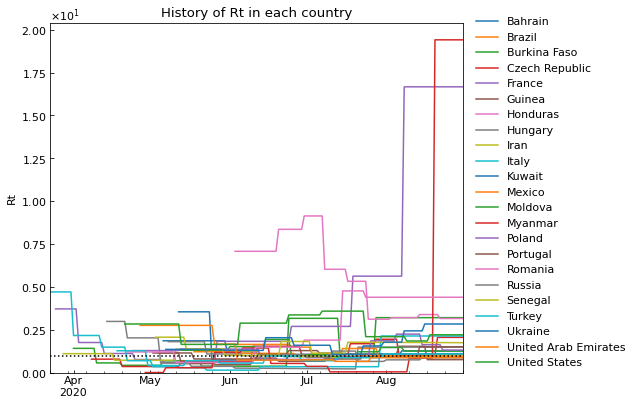

Country,Bahrain,Brazil,Burkina Faso,Czech Republic,France,Guinea,Honduras,Hungary,Iran,Italy,...,Myanmar,Poland,Portugal,Romania,Russia,Senegal,Turkey,Ukraine,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-27,1.27,0.98,3.21,2.06,16.67,0.76,3.16,1.49,1.04,2.14,...,19.41,1.32,1.51,4.4,0.87,1.75,1.09,2.84,0.88,2.21
2020-08-28,1.27,0.98,3.21,2.06,16.67,0.76,3.16,1.49,1.04,2.14,...,19.41,1.32,1.51,4.4,0.87,1.75,1.09,2.84,0.88,2.21
2020-08-29,1.27,0.98,3.21,2.06,16.67,0.76,3.16,1.49,1.04,2.14,...,19.41,1.32,1.51,4.4,0.87,1.75,1.09,2.84,0.88,2.21
2020-08-30,1.27,0.98,3.21,2.06,16.67,0.76,3.16,1.49,1.04,2.14,...,19.41,1.32,1.51,4.4,0.87,1.75,1.09,2.84,0.88,2.21
2020-08-31,1.27,0.98,3.21,2.06,16.67,0.76,3.16,1.49,1.04,2.14,...,19.41,1.32,1.51,4.4,0.87,1.75,1.09,2.84,0.88,2.21


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

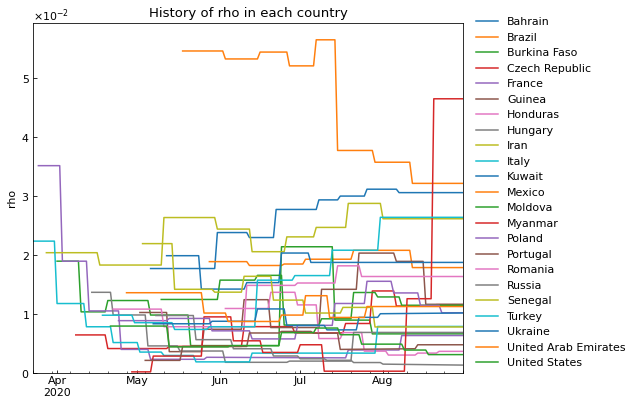

Country,Bahrain,Brazil,Burkina Faso,Czech Republic,France,Guinea,Honduras,Hungary,Iran,Italy,...,Myanmar,Poland,Portugal,Romania,Russia,Senegal,Turkey,Ukraine,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-27,0.030544,0.01783,0.006586,0.011545,0.006302,0.011598,0.003621,0.006831,0.026112,0.007846,...,0.04646,0.01017,0.004738,0.016316,0.001289,0.007758,0.026356,0.010132,0.011222,0.003068
2020-08-28,0.030544,0.01783,0.006586,0.011545,0.006302,0.011598,0.003621,0.006831,0.026112,0.007846,...,0.04646,0.01017,0.004738,0.016316,0.001289,0.007758,0.026356,0.010132,0.011222,0.003068
2020-08-29,0.030544,0.01783,0.006586,0.011545,0.006302,0.011598,0.003621,0.006831,0.026112,0.007846,...,0.04646,0.01017,0.004738,0.016316,0.001289,0.007758,0.026356,0.010132,0.011222,0.003068
2020-08-30,0.030544,0.01783,0.006586,0.011545,0.006302,0.011598,0.003621,0.006831,0.026112,0.007846,...,0.04646,0.01017,0.004738,0.016316,0.001289,0.007758,0.026356,0.010132,0.011222,0.003068
2020-08-31,0.030544,0.01783,0.006586,0.011545,0.006302,0.011598,0.003621,0.006831,0.026112,0.007846,...,0.04646,0.01017,0.004738,0.016316,0.001289,0.007758,0.026356,0.010132,0.011222,0.003068


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

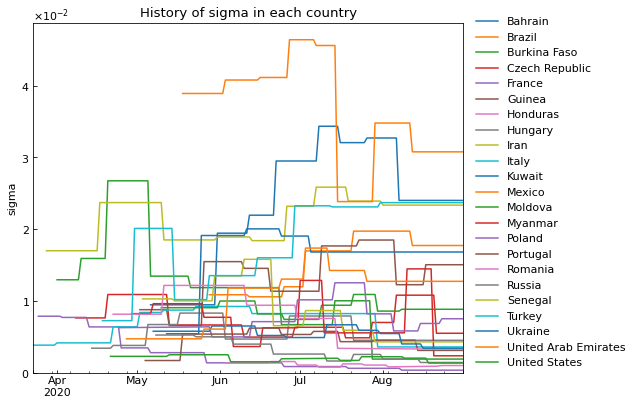

Country,Bahrain,Brazil,Burkina Faso,Czech Republic,France,Guinea,Honduras,Hungary,Iran,Italy,...,Myanmar,Poland,Portugal,Romania,Russia,Senegal,Turkey,Ukraine,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-27,0.024,0.017718,0.001898,0.005492,0.000354,0.015042,0.000999,0.004513,0.023344,0.003588,...,0.002354,0.007515,0.003105,0.003259,0.001423,0.004297,0.023689,0.003412,0.012729,0.001344
2020-08-28,0.024,0.017718,0.001898,0.005492,0.000354,0.015042,0.000999,0.004513,0.023344,0.003588,...,0.002354,0.007515,0.003105,0.003259,0.001423,0.004297,0.023689,0.003412,0.012729,0.001344
2020-08-29,0.024,0.017718,0.001898,0.005492,0.000354,0.015042,0.000999,0.004513,0.023344,0.003588,...,0.002354,0.007515,0.003105,0.003259,0.001423,0.004297,0.023689,0.003412,0.012729,0.001344
2020-08-30,0.024,0.017718,0.001898,0.005492,0.000354,0.015042,0.000999,0.004513,0.023344,0.003588,...,0.002354,0.007515,0.003105,0.003259,0.001423,0.004297,0.023689,0.003412,0.012729,0.001344
2020-08-31,0.024,0.017718,0.001898,0.005492,0.000354,0.015042,0.000999,0.004513,0.023344,0.003588,...,0.002354,0.007515,0.003105,0.003259,0.001423,0.004297,0.023689,0.003412,0.012729,0.001344


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

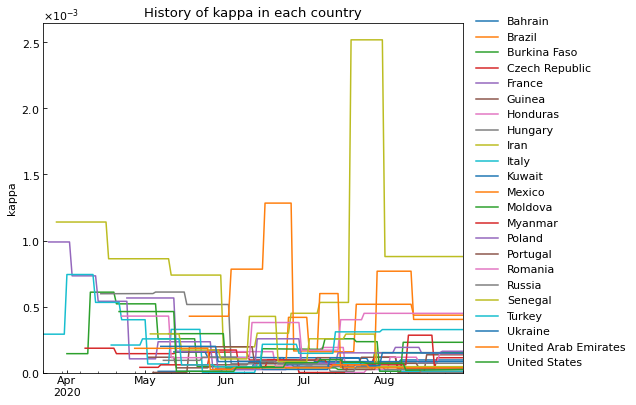

Country,Bahrain,Brazil,Burkina Faso,Czech Republic,France,Guinea,Honduras,Hungary,Iran,Italy,...,Myanmar,Poland,Portugal,Romania,Russia,Senegal,Turkey,Ukraine,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-27,0.000096,0.000435,0.000152,0.000113,0.000024,0.000136,0.000144,0.000071,0.000879,0.00001,...,0.000037,0.000162,0.000037,0.000449,0.000001,0.000046,0.000326,0.000148,0.000037,0.000024
2020-08-28,0.000096,0.000435,0.000152,0.000113,0.000024,0.000136,0.000144,0.000071,0.000879,0.00001,...,0.000037,0.000162,0.000037,0.000449,0.000001,0.000046,0.000326,0.000148,0.000037,0.000024
2020-08-29,0.000096,0.000435,0.000152,0.000113,0.000024,0.000136,0.000144,0.000071,0.000879,0.00001,...,0.000037,0.000162,0.000037,0.000449,0.000001,0.000046,0.000326,0.000148,0.000037,0.000024
2020-08-30,0.000096,0.000435,0.000152,0.000113,0.000024,0.000136,0.000144,0.000071,0.000879,0.00001,...,0.000037,0.000162,0.000037,0.000449,0.000001,0.000046,0.000326,0.000148,0.000037,0.000024
2020-08-31,0.000096,0.000435,0.000152,0.000113,0.000024,0.000136,0.000144,0.000071,0.000879,0.00001,...,0.000037,0.000162,0.000037,0.000449,0.000001,0.000046,0.000326,0.000148,0.000037,0.000024


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

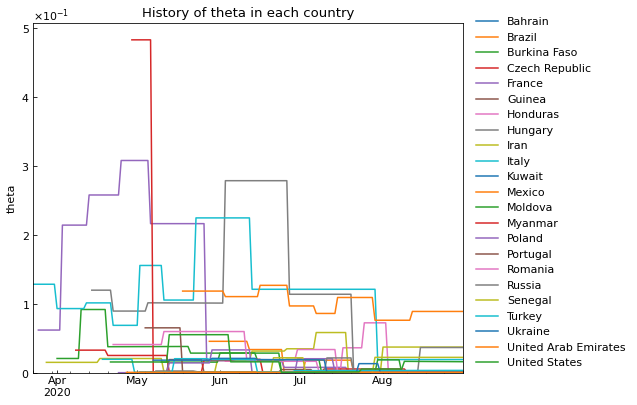

Country,Bahrain,Brazil,Burkina Faso,Czech Republic,France,Guinea,Honduras,Hungary,Iran,Italy,...,Myanmar,Poland,Portugal,Romania,Russia,Senegal,Turkey,Ukraine,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-27,0.000538,0.001394,0.000067,0.000231,0.001015,0.001294,0.001123,0.001461,0.037139,0.019041,...,0.000658,0.001163,0.001422,0.000233,0.036474,0.022224,0.00335,0.001376,0.00066,0.015907
2020-08-28,0.000538,0.001394,0.000067,0.000231,0.001015,0.001294,0.001123,0.001461,0.037139,0.019041,...,0.000658,0.001163,0.001422,0.000233,0.036474,0.022224,0.00335,0.001376,0.00066,0.015907
2020-08-29,0.000538,0.001394,0.000067,0.000231,0.001015,0.001294,0.001123,0.001461,0.037139,0.019041,...,0.000658,0.001163,0.001422,0.000233,0.036474,0.022224,0.00335,0.001376,0.00066,0.015907
2020-08-30,0.000538,0.001394,0.000067,0.000231,0.001015,0.001294,0.001123,0.001461,0.037139,0.019041,...,0.000658,0.001163,0.001422,0.000233,0.036474,0.022224,0.00335,0.001376,0.00066,0.015907
2020-08-31,0.000538,0.001394,0.000067,0.000231,0.001015,0.001294,0.001123,0.001461,0.037139,0.019041,...,0.000658,0.001163,0.001422,0.000233,0.036474,0.022224,0.00335,0.001376,0.00066,0.015907


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29205 entries, 0 to 29512
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 29205 non-null  datetime64[ns]
 1   Country                              29205 non-null  object        
 2   Rt                                   29205 non-null  float64       
 3   theta                                29205 non-null  float64       
 4   kappa                                29205 non-null  float64       
 5   rho                                  29205 non-null  float64       
 6   sigma                                29205 non-null  float64       
 7   School_closing                       29205 non-null  int64         
 8   Workplace_closing                    29205 non-null  int64         
 9   Cancel_events                        29205 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.193218,-0.003453,0.160108,-0.273068,-0.293292,-0.086262,0.053188,0.166421,-0.113998,-0.049364,-0.003957,-0.223769,0.019890,-0.143003,-0.189075,-0.101301
theta,-0.193218,1.000000,0.290460,0.052954,0.212514,0.223513,0.305704,0.126920,-0.211511,-0.078652,-0.034682,-0.090094,-0.061418,0.021669,-0.534749,-0.084969,0.236094
kappa,-0.003453,0.290460,1.000000,0.611974,0.333021,0.221016,0.370443,0.018369,0.013068,0.163328,0.160800,0.095619,0.132916,-0.120997,-0.373487,-0.213594,0.352282
rho,0.160108,0.052954,0.611974,1.000000,0.612288,0.170655,0.093245,-0.164816,-0.157719,0.021380,0.027856,-0.044211,0.202350,-0.124486,-0.349464,-0.194178,0.144503
sigma,-0.273068,0.212514,0.333021,0.612288,1.000000,0.172805,-0.096115,-0.175650,-0.487696,-0.177777,-0.138315,-0.320498,0.148616,-0.155822,-0.375454,0.131575,-0.046976
School_closing,-0.293292,0.223513,0.221016,0.170655,0.172805,1.000000,0.601139,0.340259,0.103227,0.417135,0.356016,0.257145,0.490395,-0.040343,0.138685,-0.448496,0.639479
Workplace_closing,-0.086262,0.305704,0.370443,0.093245,-0.096115,0.601139,1.000000,0.426650,0.399855,0.564744,0.549393,0.474723,0.227161,-0.004421,0.045831,-0.480155,0.763735
Cancel_events,0.053188,0.126920,0.018369,-0.164816,-0.175650,0.340259,0.426650,1.000000,0.542583,0.355201,0.492722,0.359711,-0.018802,-0.016105,0.201653,-0.165155,0.548951
Gatherings_restrictions,0.166421,-0.211511,0.013068,-0.157719,-0.487696,0.103227,0.399855,0.542583,1.000000,0.590693,0.581457,0.612502,0.067916,0.065219,0.398819,-0.264178,0.577143
Transport_closing,-0.113998,-0.078652,0.163328,0.021380,-0.177777,0.417135,0.564744,0.355201,0.590693,1.000000,0.630306,0.813517,0.235435,-0.103279,0.325688,-0.324480,0.749091


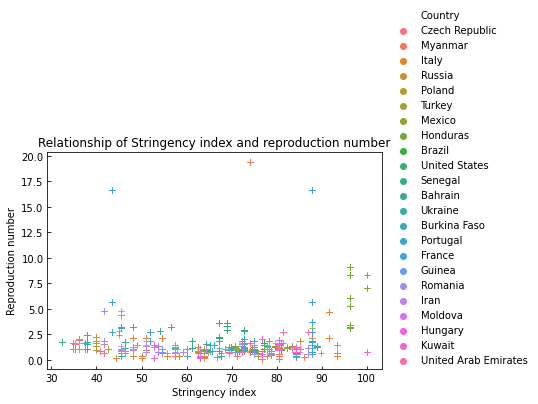

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()